# Week5
*time: 2024.05.06 - 2024.05.12*
## 3. 应用机器学习的建议
### 3.1 模型评估
* 训练集和测试集：训练集用于训练模型的参数，测试集用于评估模型的性能
* 回归：使用平方误差（不包含正则化项）评估模型的性能
    * 测试误差：是测试集上的平均误差
    * 训练误差：训练集上的平均误差
* 分类：使用分类错误率来评估模型的性能
    * 测试错误率：测试集上被错误分类的样本的比例
    * 训练错误率：训练集上被错误分类的样本的比例
* 通过计算测试误差和训练误差，可以了解模型在测试集和训练集上的表现，从而判断模型的泛化能力
### 3.2 模型选择和训练/交叉验证/测试集

* 为了评估模型的性能，通常将数据分为三个部分：训练集、交叉验证集和测试集。
* 训练集用于训练模型，即通过训练数据来调整模型的参数，使其能够更好地拟合数据。
* 交叉验证集用于选择最佳的模型。具体地，可以尝试不同的模型或不同的超参数设置，并使用交叉验证集来评估它们的性能。
* 测试集用于最终评估模型的性能。测试集是模型从未见过的数据，因此可以用来估计模型在真实世界中的表现。
* 不能使用测试集进行模型选择的原因：泄露信息，导致过分乐观地估计模型的性能。

```python
# 获取60%的数据集作为训练集。将剩余的40%放在临时变量中,x_和y_
x_train, x_, y_train, y_= train_test_split(x, y, test_size = 0.40, random_state = 1)
# 分离其中的40%，其中一半是cross validation,另一半作为test set.
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size = 0.50, random_state = 1)
# 初始化类
scaler_linear = StandardScaler()
# 计算训练集的均值和标准差，然后转换它
X_train_scaled = scaler_linear.fit_transform(x_train)
# 初始化类
linear_model = LinearRegression()
# 训练模型
linear_model.fit(X_train_scaled, y_train )
#传入X_train并获得预测
yhat = linear_model.predict(X_train_scaled)
#使用scikit-learn的函数并除以2
print(f"training MSE (using sklearn function): {mean_squared_error(y_train, yhat) / 2}")

total_squared_error = 0

for i in range(len(yhat)):
    squared_error_i  = (yhat[i] - y_train[i])**2
    total_squared_error += squared_error_i                                              

mse = total_squared_error / (2*len(yhat))

X_cv_scaled = scaler_linear.transform(x_cv)
yhat = linear_model.predict(X_cv_scaled)

```

### 3.3 偏差和方差(bias and variance)

* underfit: high bais
* ovewrfit: high variance
* 偏差（bias）指的是算法对训练集的拟合程度。如果算法的偏差很高，意味着它无法很好地拟合训练集，即欠拟合。
* 方差（variance）指的是算法对新数据的泛化能力。如果算法的方差很高，意味着它在训练集上表现很好，但在新数据上表现较差，即过拟合。

* 高偏差问题：如果算法在训练集上表现不佳（J_train高），则可能存在高偏差问题。
* 高方差问题：如果算法在交叉验证集上的误差远大于训练集上的误差（J_cv >> J_train），则可能存在高方差问题。

### 3.4 benchmark/ baseline level performance
* 在判断学习算法是否存在高偏差或高方差问题时，可以通过比较训练误差和交叉验证误差与基准水平的差异来判断
* 基准水平可以是人类在该任务上的表现，也可以是其他算法的性能
* 如果训练误差远高于基准水平，而交叉验证误差与训练误差相差不大，那么算法可能欠拟合问题
* 如果训练误差与基准水平相差不大，但交叉验证误差远高于训练误差，那么算法可能存在过拟合问题

### 3.5 学习曲线

* 学习算法面临高偏差时，增加训练数据可能不会有太大帮助
* 学习算法面临高方差时，增加训练数据可能会有很大帮助
* 学习曲线可以帮助我们判断算法是面临高偏差还是高方差的问题
* 当学习曲线显示出训练误差和交叉验证误差都很高时，可能是高偏差(under fitting)的问题
* 当学习曲线显示出训练误差很低，但交叉验证误差很高时，可能是高方差(over fitting)的问题
* 绘制学习曲线需要训练多个模型，使用不同大小的训练集，并计算训练误差和交叉验证误差

###  3.6 改进算法性能
* **如果算法存在高偏差问题**（即在训练集上表现不佳或欠拟合)，可以尝试以下方法：
    * 增加训练样本数量
    * 减少特征数量或简化模型
    * 减小正则化参数$\lambda$的值
    
* **如果算法存在高方差问题**（即在训练集上表现良好但在交叉验证集上表现不佳，或过拟合），可以尝试以下方法：
    * 增加训练样本数量
    * 增加特征数量或复杂化模型
    * 增大正则化参数$\lambda$的值

* 加入正则化的训练模型:
```python
tf.random.set_seed(1234)
model_r = Sequential(
    [
        Dense(120, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.1), name="L1"), 
        Dense(40, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.1), name="L2"),  
        Dense(classes, activation = 'linear', name="L3")  
    ], name="ComplexRegularized"
)
model_r.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    optimizer=tf.keras.optimizers.Adam(0.01),                             
)

model_r.fit(
    X_train,y_train,
    epochs=1000
)                                   
```

* 可以通过迭代尝试一系列的$\lambda$值试图找到最合适的正则化参数:

```python
tf.random.set_seed(1234)
lambdas = [0.0, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3]
models=[None] * len(lambdas)

for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(120, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(40, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(classes, activation = 'linear')
        ]
    )
    models[i].compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(0.01),
    )

    models[i].fit(
        X_train,y_train,
        epochs=1000
    )
    print(f"Finished lambda = {lambda_}")

```

### 3.7 偏差、方差和神经网络
* 高偏差：使用更大的神经网络，增加隐藏层的数量或每层的隐藏单元数量
* 高方差：获取更多的数据，以提供更多的样本来训练模型
* 只要正则化得当，更大（更复杂）的神经网络一般不会导致更严重的过拟合问题，但对算力提出了更高的要求，并且训练的过程可能会更慢
* 实际应用时高方差问题较高偏差更严重
* 增加神经网络的大小和获取更多的数据都有一定的限制


### 3.8 迁移学习
* 迁移学习是一种利用从不同任务中获得的数据来帮助解决当前任务的技术。
* 在迁移学习中，你可以使用一个已经在大型数据集上训练好的神经网络作为起点，然后通过微调参数来适应当前任务
* 迁移学习的关键是将已经训练好的神经网络的参数复制到新的神经网络中，并根据需要调整输出层的参数
* 可以选择只训练输出层的参数，或者训练整个网络的参数，但前四层的参数将使用从上面训练得到的值进行初始化
* 依赖于预训练和微调步骤之间的数据类型的一致性

## 4. 决策树
### 4.1 决策树和熵
* 熵是一种衡量节点不确定性的度量方式。
* 熵的计算方法：
    * 对于给定的节点，计算每个类别的样本数量
    * 计算每个类别在节点中的比例
    * 对于每个类别的比例，计算其对数的负值，并乘以该比例
    * 将所有类别的结果相加，并取负值，得到节点的熵
* 熵的计算结果越高，表示节点的不确定性越大，样本的混合程度越高
* 熵的计算结果越低，表示节点的纯度越高，样本的类别越一致
* 在决策树中，我们希望选择熵最小的特征进行分割，以最大程度地提高节点的纯度
* 通过不断选择熵最小的特征进行分割，我们可以构建出一个纯度较高的决策树模型，用于预测新样本的类别


### 4.2 熵和纯度
* 熵是衡量数据集纯度的一种方式，它的取值范围是从0到1
* 对二分类问题，熵的计算基于数据集中正例的比例，用p1表示：

$$
\begin{align*}
& H(p_1) = - p_1log_{2}{p_1} - p_0log_{2}{p_0}\\
& where: \ p_0 = 1 - p_1
\end{align*}
$$

* 熵函数的图像呈现一个曲线，当数据集中正例和负例的比例为50-50时，熵最大，也就是最不纯，熵的值为1
* 当数据集中只有正例或只有负例时，熵为0，表示最纯
* 熵可以用于决策树中的特征选择，帮助我们决定在节点上选择哪个特征进行分割

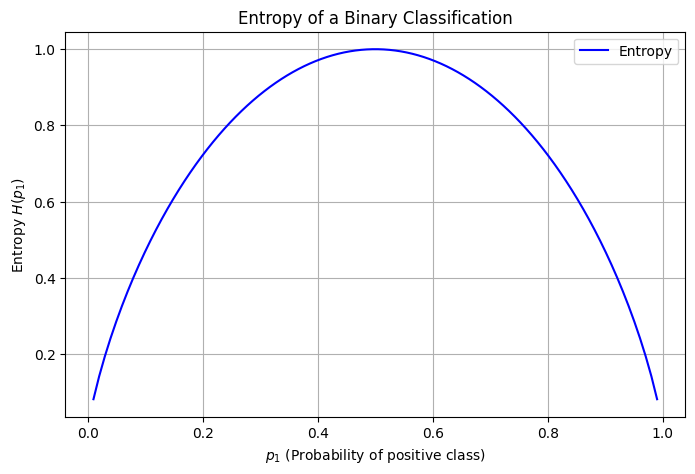

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定义熵计算函数
def entropy(p1):
    if p1 == 0 or p1 == 1:
        return 0
    p0 = 1 - p1
    return -p1 * np.log2(p1) - p0 * np.log2(p0)

# 生成 p1 的值
p1_values = np.linspace(0.01, 0.99, 100)  # 避免log(0)的计算错误

# 计算熵
entropy_values = [entropy(p1) for p1 in p1_values]

# 绘制熵的曲线图
plt.figure(figsize=(8, 5))
plt.plot(p1_values, entropy_values, label='Entropy', color='blue')
plt.xlabel('$p_1$ (Probability of positive class)')
plt.ylabel('Entropy $H(p_1)$')
plt.title('Entropy of a Binary Classification')
plt.grid(True)
plt.legend()
plt.show()

### 4.3 信息增益与特征分割
- **决策原则**：
  选择能够最大程度地减少熵（即增加纯度）的特征进行分割
- **熵的减少** 称为**信息增益**
- 信息增益通过以下步骤计算：
  * 计算根节点的熵
  * 对每个可能的特征，计算该特征分割后左右子树的熵
  * 采用左右子树的熵和对应权重，计算加权平均熵
  * 信息增益 = (分割前)根节点的熵 - （分割后）左右子树的加权平均熵
- 选择信息增益最大的特征作为分割特征

### 4.4 构建决策树

* **初始化根节点**
  - 放置所有训练样本
  - 计算所有特征的信息增益

* **选择并应用分割特征**
  - 选择信息增益最高的特征
  - 根据该特征将数据集分割成两个子集
  - 为每个子集创建新的子树节点

* **递归构建子树**
  - 对每个新创建的子节点重复分割过程
  - 使用相同的方法选择分割特征并创建更深层的子树
  - 递归继续，直到满足停止条件：
      - 节点纯度高（熵为零）
      - 达到最大深度
          - 最大深度的选择类似于回归中的多项式阶数
          - 最大深度越大，模型复杂程度越高，同时过拟合风险越大
          - 同样可以使用正则化解决过拟合问题
          - 通常库中有默认参数
      - 样本数过少
      - 信息增益过低

* **终止与预测**
  - 当达到停止条件时，当前节点成为叶节点
  - 叶节点用于基于最常见类别或平均值等进行预测


### 4.5 using one-hot encoding
- 当特征拥有超过两个离散取值时，可使用独热编码
- 独热编码将原始特征替换为多个二进制特征，每个特征只能取 0 或 1
- 对于一个拥有 k 个可能取值的分类特征，创建 k 个二进制特征
- 每个二进制特征表示原始特征的一个取值，其中只有一个特征的值为 1，其他特征值均为 0
- 该编码方法称为独热编码，因为其中一个特征值总为 1，所以被称为“热”特征
- 使用独热编码后，决策树学习算法可以直接应用于编码后的特征
  